In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
car = pd.read_csv(r'C:\Users\ADMIN\Desktop\CDAC Data Scientist\Python Machine Learning\Data Sets\car_data.csv')
car.head()

,Car_Name,Year,Selling_Price,Purchased_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         301 non-null    object 
 1   Year             301 non-null    int64  
 2   Selling_Price    301 non-null    float64
 3   Purchased_Price  301 non-null    float64
 4   Kms_Driven       301 non-null    int64  
 5   Fuel_Type        301 non-null    object 
 6   Seller_Type      301 non-null    object 
 7   Transmission     301 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


In [4]:
car.describe(include='all')

,Car_Name,Year,Selling_Price,Purchased_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301
unique,98,NaN,NaN,NaN,NaN,3,2,2
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual
freq,26,NaN,NaN,NaN,NaN,239,195,261
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN


In [5]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Purchased_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission'],
      dtype='object')

In [6]:
# Exploratary Data Analysis EDA

In [7]:
plt.style.use('dark_background')

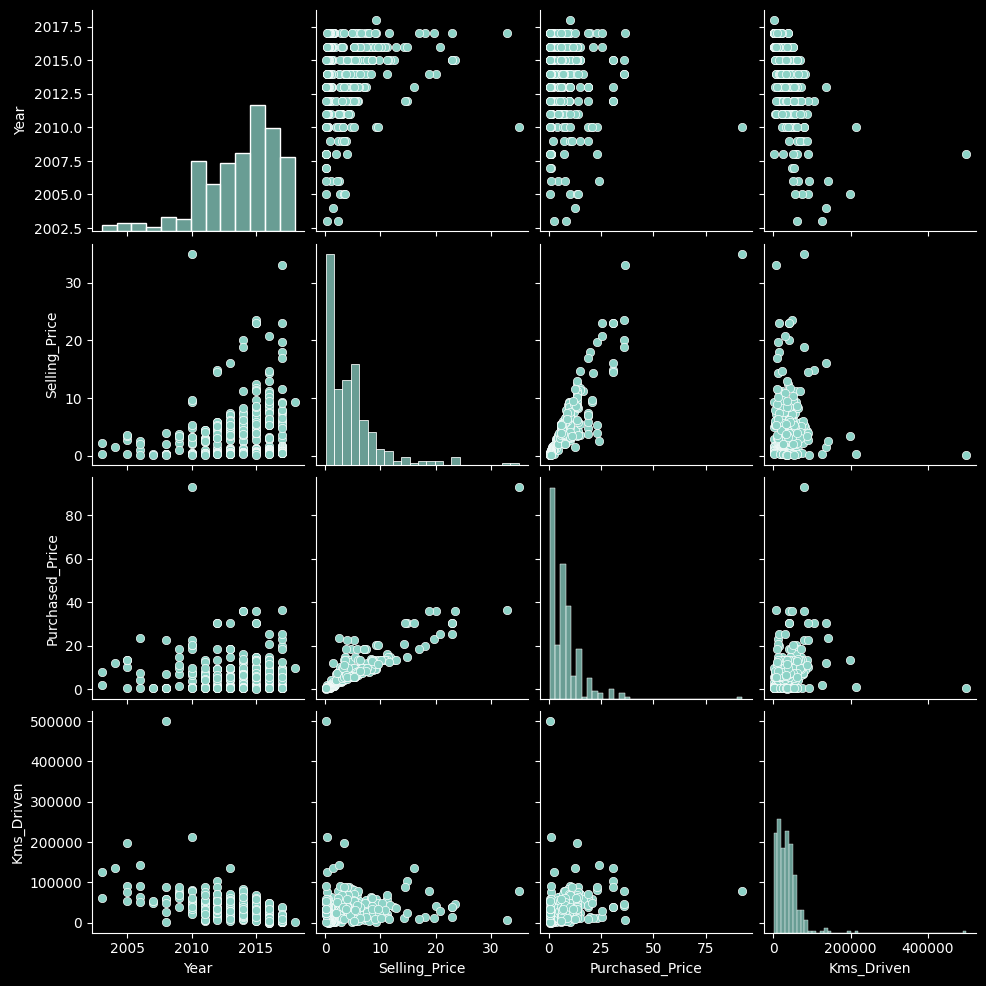

In [8]:
sns.pairplot(car)

<Axes: >

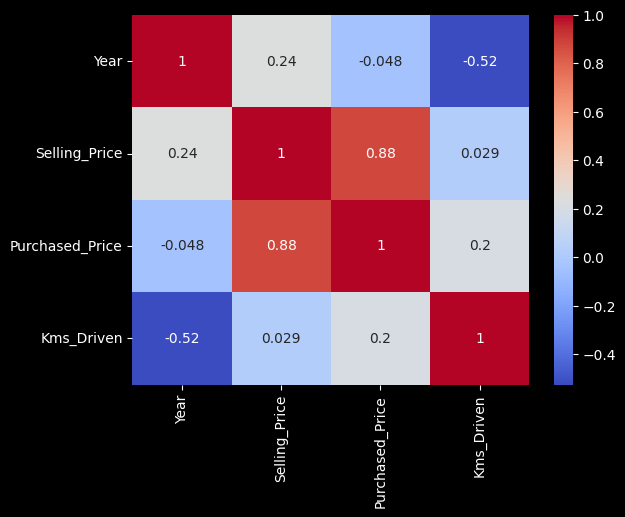

In [9]:
sns.heatmap(car.corr(), cmap='coolwarm', annot=True)

In [10]:
x = car[['Year', 'Purchased_Price', 'Kms_Driven', 'Fuel_Type', 'Transmission']]
x.head(2)

,Year,Purchased_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,5.59,27000,Petrol,Manual
1,2013,9.54,43000,Diesel,Manual


In [11]:
y = car[['Selling_Price']]
y.head(2)

,Selling_Price
0,3.35
1,4.75


In [12]:
# Check Missing Data

In [13]:
car.isna().sum()

Car_Name           0
Year               0
Selling_Price      0
Purchased_Price    0
Kms_Driven         0
Fuel_Type          0
Seller_Type        0
Transmission       0
dtype: int64

In [14]:
# Check Categorical Data

In [15]:
x['Fuel_Type'].nunique()

3

In [16]:
x['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [17]:
x['Transmission'].nunique()

2

In [18]:
x['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [19]:
# One Hot Encoding using dummies

In [20]:
x = pd.get_dummies(x, columns=['Fuel_Type', 'Transmission'])
x.head()

,Year,Purchased_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240, 1)
(61, 1)


In [23]:
lm = LinearRegression()

In [24]:
lm.fit(x_train, y_train)

LinearRegression()

In [25]:
predictions = lm.predict(x_test)

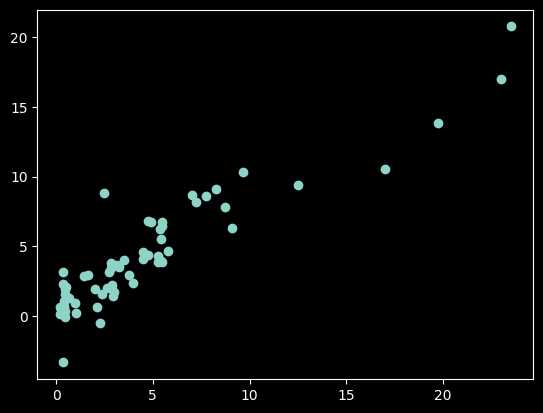

In [26]:
plt.scatter(y_test, predictions)

In [27]:
x_test.head()

,Year,Purchased_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
239,2012,4.43,23709,0,0,1,0,1
97,2017,18.64,8700,0,0,1,0,1
203,2011,4.60,53460,0,0,1,0,1
220,2017,4.43,38488,0,0,1,0,1
102,2017,1.78,4000,0,0,1,0,1


In [28]:
y_test.head()

,Selling_Price
239,2.00
97,17.00
203,2.95
220,3.50
102,1.65


In [29]:
user = [[2012, 4.43, 23709, 0, 0, 1, 0, 1]]

In [30]:
result = lm.predict(user)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.91458436]])

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', round(r2_score(y_test, predictions),2))

MAE: 1.4427733306988146
MSE: 4.307151146113184
RMSE: 2.0753677134698765
R2: 0.84
